<a href="https://colab.research.google.com/github/jmccann7/Projects/blob/main/Midterm_James_McCann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

The purpose of my project is going to be to evaluate and show voter registration patterns in this country based on the data set provided. Then using that data create visualizations that will help to convey my findings to any reader. The goal of this project will be to show that between 2016 and 2020 there was an increase in voter registration both nationally as well as within the states. It is important to read this notebook because it will show whether or not this hypothesis is true or false and why. My two research questions are as follows:
1. Nationally, were there more newly registered voters in 2016 or 2020?
2. In the state of Colorado were there more newly registered voters in 2016 or 2020?

In [3]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [4]:
voters.isna()

,Jurisdiction,Year,Month,New registered voters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
101,False,False,False,False
102,False,False,False,False
103,False,False,False,False
104,False,False,False,False


In [5]:
voters.isnull().values.any()

False

In [6]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In [7]:
voters.columns

Index(['Jurisdiction', 'Year', 'Month', 'New registered voters'], dtype='object')

In [8]:
voters= voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})

In [9]:
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

A potential limitation of this dataset is the lack of information about the newly registered voters. You don't know if all of them have just now turned 18 or some of them have never voted and are in their mid-forties. It is a weakness that may cause some to misinterpret the data. As well as this weakness, an even larger weakness that a noticed later reading the data itself and noticing little details is that certain states are missing May data. This is a huge weakness because when comparing May's registration numbers total it will have far less than the other months that have data from every state.

In [10]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


California in February of 2020 had the most newly registered voters with 238,281 people

In [11]:
voters.registered_voters.mean()

48223.46226415094

Average voter registration is 48,223.46 people

In [12]:
high_voters = voters[voters["registered_voters"] >= 49223]

In [13]:
high_voters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               35 non-null     object
 1   Year               35 non-null     int64 
 2   Month              35 non-null     object
 3   registered_voters  35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


The amount of times a state has had higher than the average 49,223 count of newly registered voters was 35 times.

In [14]:
high_voters.value_counts("NAME")

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,2
Georgia,1


The amount of times each state was over the average:
Arizona: 2
California: 7
Colorado: 0
Deleware: 0
Washington D.C.: 0
FLorida: 7
Georgia: 1
Illinois: 4
Maryland: 0
North Carolina: 6
Texas: 8
Virginia: 0


In [15]:
high_voters.value_counts("NAME").head(3)

,count
NAME,
Texas,8
California,7
Florida,7


The top 3 states to have registered voters be above the average was Texas with 8, California with 7, and Florida with 7.

In [16]:
dark = sns.color_palette("dark")
total_voters = voters.groupby("NAME")["registered_voters"].sum().reset_index()

<ipython-input-17-9177c9012ccf>:2: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(total_voters, x="NAME", y="registered_voters",hue = "NAME", palette= dark)


Text(0.5, 1.0, 'The Amount of New Voters by State')

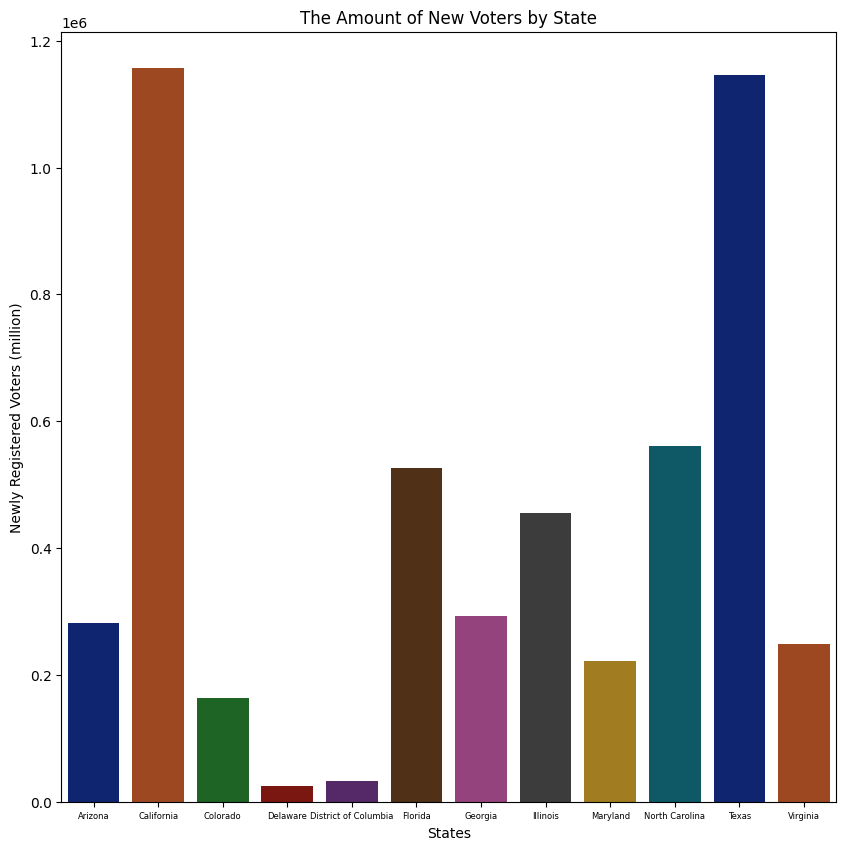

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(total_voters, x="NAME", y="registered_voters",hue = "NAME", palette= dark)
plt.xlabel("States")
plt.ylabel("Newly Registered Voters (million)")
plt.xticks(fontsize = 6)
plt.title("The Amount of New Voters by State")

Some trends I saw within the graph was that the states that were larger in population had a greater number of newly registered voters. Of course this comes as no surprise but is evident when you see that the two highest states are California and Texas which are two of the states with the most electoral votes as their populations are large.

In [18]:
total_year_voters = voters.groupby(["Year","Month"])["registered_voters"].sum().reset_index()

<ipython-input-19-e8361703352b>:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(total_year_voters, x="Year", y="registered_voters",hue = "Month", palette= dark)


Text(0.5, 1.0, 'Newly Registered Voters per Year')

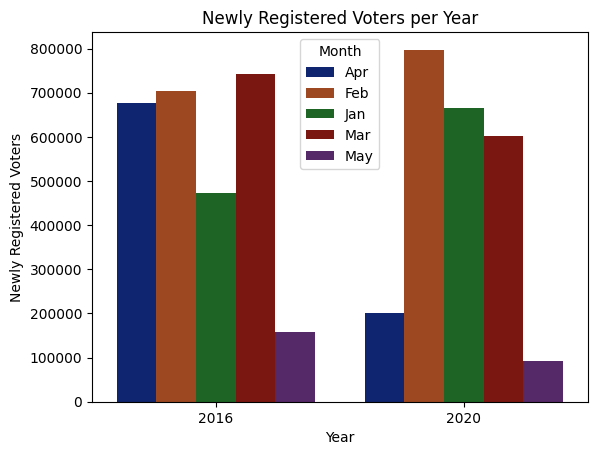

In [19]:
sns.barplot(total_year_voters, x="Year", y="registered_voters",hue = "Month", palette= dark)
plt.xlabel("Year")
plt.ylabel("Newly Registered Voters")
plt.title("Newly Registered Voters per Year")

One interesting trend I noticed within the graph was the far lower quantity of voter registration in April of 2020 compared to 2016. This is very interesting because it shows yet another impact of Covid-19 as when we went into lockdown in March of 2020 it decreased voter registration as less people were leaving their homes.

In [20]:
colorado_voters = voters[voters["NAME"] == "Colorado"]
total_colorado_voters = colorado_voters.groupby("Year")["registered_voters"].sum().reset_index()

<ipython-input-21-7bf6631a95d2>:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(total_colorado_voters, x="Year", y="registered_voters",hue= "Year", palette=dark)


Text(0.5, 1.0, 'In Colorado which Year saw more Voter Registration')

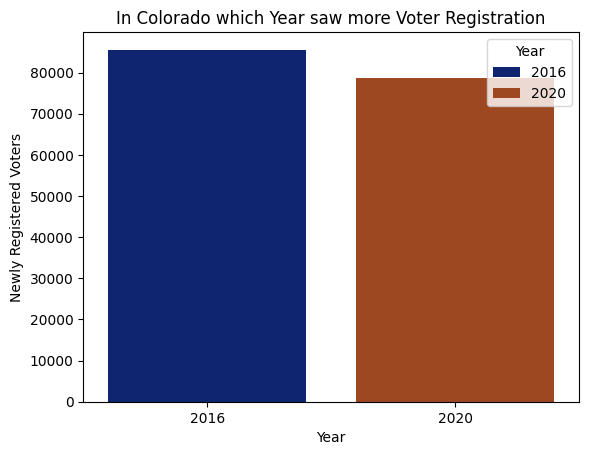

In [21]:
sns.barplot(total_colorado_voters, x="Year", y="registered_voters",hue= "Year", palette=dark)
plt.xlabel("Year")
plt.ylabel("Newly Registered Voters")
plt.title("In Colorado which Year saw more Voter Registration")

This graph helps to provide an answer to the question: In the state of Colorado were there more newly registered voters in 2016 or 2020? This graphs shows that in 2016 there was a greater number of people who registered to vote, being around 850,000 people compared to 2020's 780,000 people.

In [22]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [23]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

In [24]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

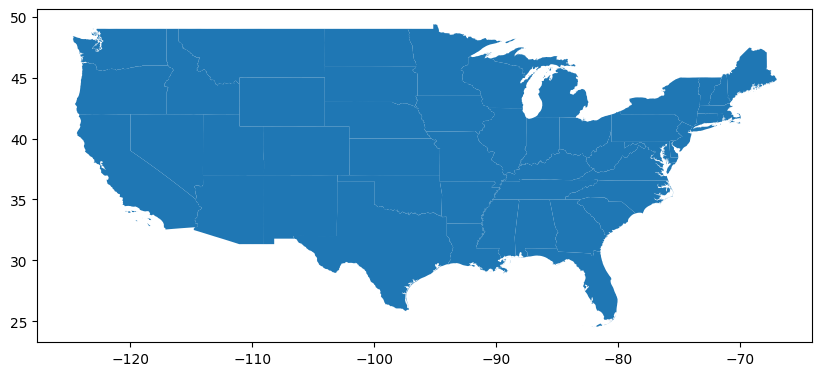

In [25]:
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))
plt.show()

In [26]:
state_average = voters.groupby("NAME")["registered_voters"].mean().reset_index()

In [27]:
state_average.head(12)

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


In [28]:
states_map= bbox.merge(state_average, on="NAME", how="inner")

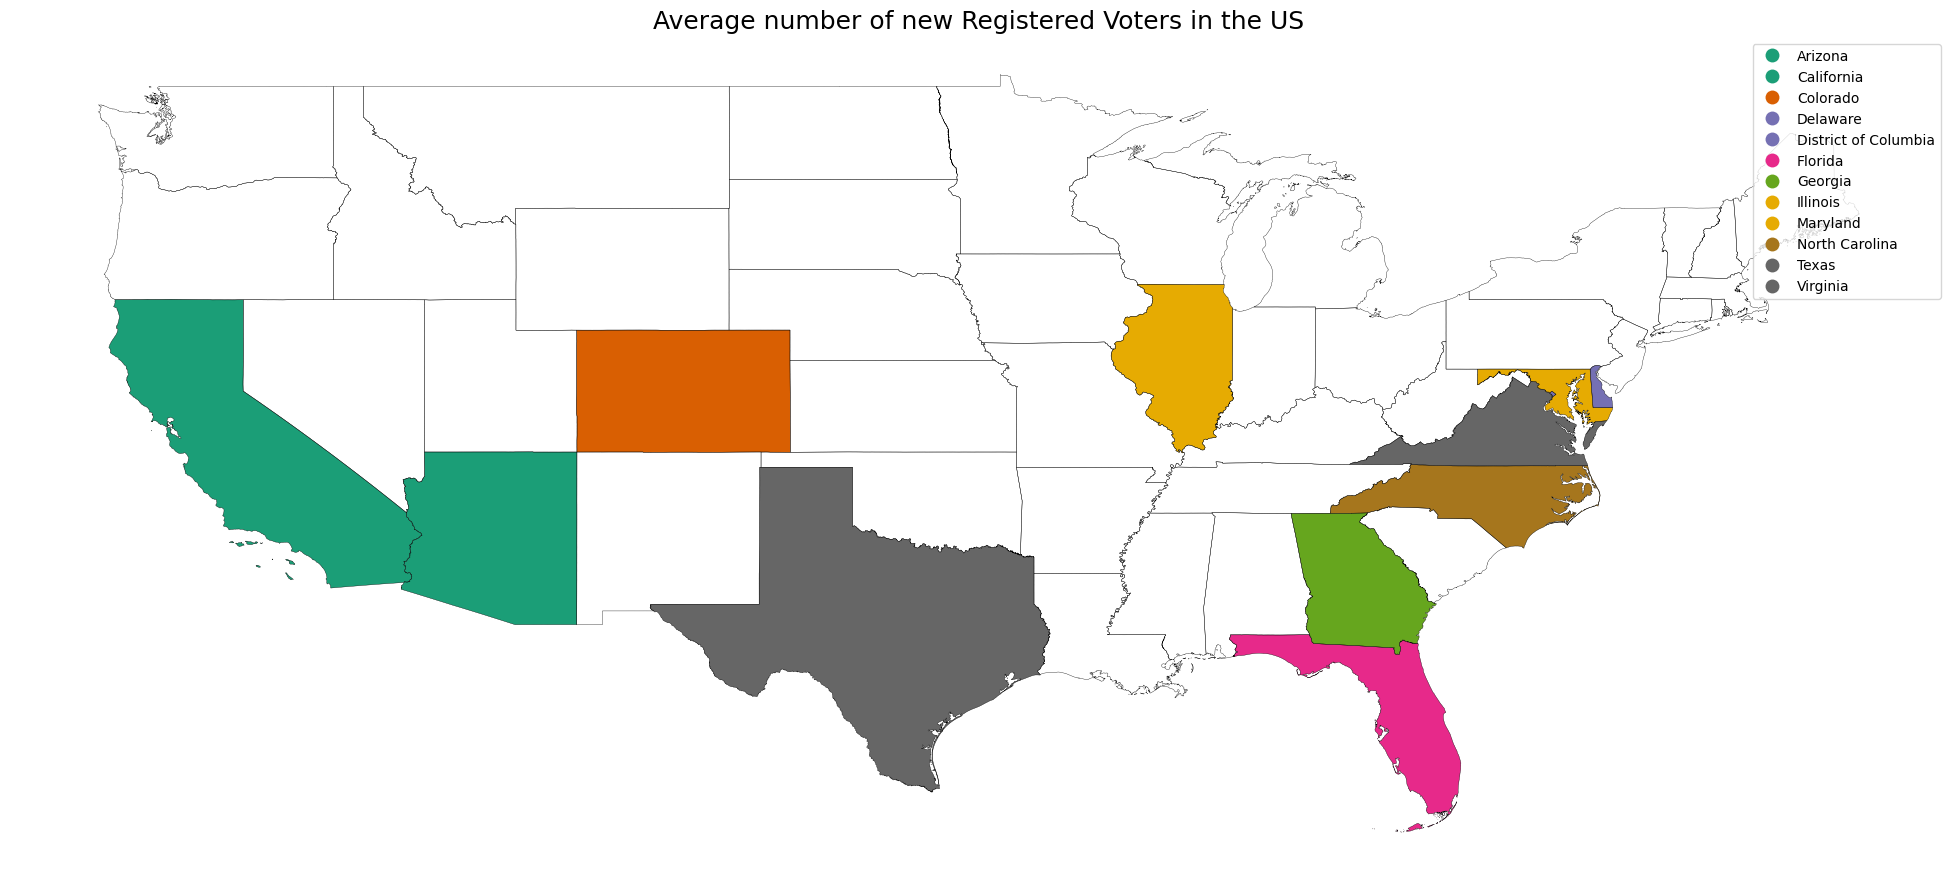

In [40]:
us_map=bbox.boundary.plot(figsize=(25,15),color="black",linewidth = .25)
states_map.plot(column = "NAME",legend = True,figsize=(25,15),ax=us_map,cmap="Dark2",linewidth=.25)
us_map.axis("off")
plt.title("Average number of new Registered Voters in the US",fontsize = 18)
plt.show()

Conclusion:

In this notebook the questions asked at the beginning of this notebook were answered by its contents and visualizations. The notebook was able to convey the voter registration data very well from graphs depicting the total newly registered voters compared to both the year and by state. This is very useful data because it allows anyone who looks at it to have an easier time noticing or detecting any possible trends in the data. This could also with the knowledge of outside factors like the within mentioned corona virus lead to conclusions surrounding these trends.

One suggestion I would have for this data is to be wary of the gaps that exist within the data. I brought this up in the notebook but being aware that only some states had the month of may within their data and this could skew results. If you are looking at a graph that has totals by state like is in this notebook the states with a whole additional month of data are going to look higher even if in the same time periods they had less registrations.

One next step I would suggest surrounding the data would be to make another visualization combining the two graphs that were made here. That being the totals by year and totals by state. Next you should do individual graphs of state and year by the total registrations. This would allow you to notice if one state is increasing while others are decreasing or vice versa. Once a trend like that is noticed you can go into further research to determine what happened to cause an effect like that.



Git Hub Link:

Academic Integrity Statement
By writing my name in the cell below, I certify that:

I did not use resources other than:
the Python notebooks provided by the instructor,
links provided in this notebook,
the assigned readings, and
my own personal notes
This means that I did not:
look up anything on Google, or Stack Overflow, Chatgpt, &c.,
discuss the content of the exam with anyone other than the instructors or TAs, or
do anything that technically doen't break these rules but is against their spirit.

Signature: James McCann